<a href="https://colab.research.google.com/github/sairamadithya/cardiovascular_risk_prediction/blob/main/app_for_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING ESSENTIAL LIBRARIES

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn 
import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout



# COLLECTING THE DATASET
this dataset consists of information from around 70000 patients.
source- kaggle datasets
link- https://www.kaggle.com/sulianova/cardiovascular-disease-dataset
this is available as a CSV (comma seperated values)
   
The pandas library is used to convert the comma seperated values into distinguised table type data  

pd.set_option('display.max_columns', None) is used to expand along the columns and
pd.set_option('display.max_rows', None) is used to expand along the rows

follow this image to upload the dataset
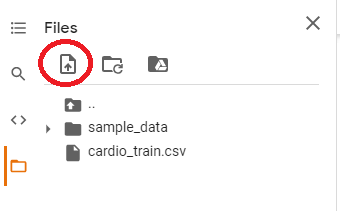

In [ ]:
data= pd.read_csv('cardio_train.csv',sep=";")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x :'% 3f' % x)
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.000000,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.000000,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.000000,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.000000,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.000000,100,60,1,1,0,0,0,0


THE FOLLOWING CHANGES ARE TO BE MADE BEFORE USING THE DATA

1.the id column of the data doesn't affect the output. hence we can drop that

2.the age is in days. hence we convert to years by dividing by 365

3. we calculate BMI from height and weight so as to reduce the data entry. the following formula is used

BMI= height/(weight)2

4. we drop the height and weight column since they are replaced by the BMI column.

5. the cardio column is the output hence we remove it

we have to convert the new column into integer datatype after each manipulation

In [ ]:
data= data.drop('id', axis=1)
data['age']= data['age']/365
data['age']= data['age'].astype(int)
data['BMI'] = data['weight']/(np.power(data['height']/100, 2))
data['BMI'] = data['BMI'].astype(int)
data['Cardio_disease'] = data['cardio']
data = data.drop(columns = ['height','cardio','weight'])
data.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,Cardio_disease
0,50,2,110,80,1,1,0,0,1,21,0
1,55,1,140,90,3,1,0,0,1,34,1
2,51,1,130,70,3,1,0,0,0,23,1
3,48,2,150,100,1,1,0,0,1,28,1
4,47,1,100,60,1,1,0,0,0,23,0


#STANDARDISATION OF DATA

except few columns the rest are in the range of 0,1,2,3. some columns have high values when compared to others. Hence to maintain a degree of uniformity of data, standardisation is used.

the process of stanardisation is done to reduce the range of the data. basically scaling them to a narrow range.

it is done by the following manipulation to all the entries
standardised= data- (mean of data)/ standard deviation of data

the BMI, age, ap_hi and ap_lo are the ones to be standardised
the following image shows the difference before and after standardisation


In [ ]:
std_list = ["age" ,"BMI","ap_hi", "ap_lo"] 

def standartization(x):
    x_std = x.copy(deep=True)
    for column in std_list:
        x_std[column] = (x_std[column] - x_std[column].mean()) / x_std[column].std() 
    return x_std

data= standartization(data)
data.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,Cardio_disease
0,-0.419797,2,-0.122181,-0.088238,1,1,0,0,1,-0.994006,0
1,0.319108,1,0.072610,-0.035180,3,1,0,0,1,1.136672,1
2,-0.272016,1,0.007679,-0.141296,3,1,0,0,0,-0.666209,1
3,-0.715359,2,0.137540,0.017878,1,1,0,0,1,0.153282,1
4,-0.863140,1,-0.187111,-0.194354,1,1,0,0,0,-0.666209,0


BEFORE STANDARDISATION
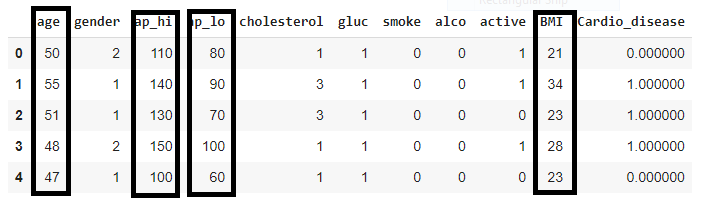

AFTER STANDARDISATION
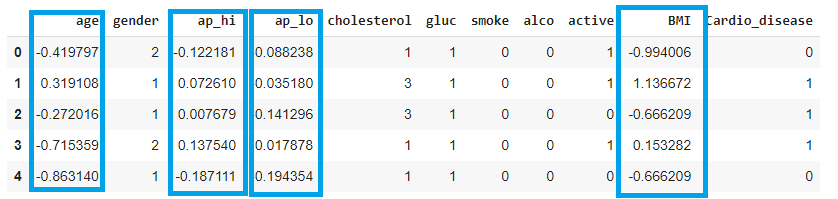

# DATA SPLITTING

the X is considered as input and Y is considered as output.

the iloc function is used to select the ranges of columns and rows. the syntax is iloc[row,column] the : indicates all

X= all rows, all columns except the last

Y= all rows, only the last column

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[: ,-1]


the train_test_split function from the sklearn module is being used here for splitting the data. 

the standard splitting ratio is 75:25 meaning 75% data for training and 25% data for testing. we can also shuffle the data if needed

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test ,y_train, y_test = train_test_split(X,y,
                                                   test_size=0.05,
                                                   random_state=0,
                                                  shuffle = True,
                                                  stratify = y)

print('training data shape is :{}.'.format(X_train.shape))
print('training label shape is :{}.'.format(y_train.shape))
print('testing data shape is :{}.'.format(X_test.shape))
print('testing label shape is :{}.'.format(y_test.shape))

training data shape is :(66500, 10).
training label shape is :(66500,).
testing data shape is :(3500, 10).
testing label shape is :(3500,).


# MODEL CREATION

we are using the sequential from keras to build an empty model and then stack upon the layers of our choice. since this is a binary classification, the best activation function is sigmoid.

the input is equal to the number of columns in x

In [ ]:

model = Sequential() 

model.add(Dense(10,  activation = 'sigmoid' ,input_dim = 10)) #input layer
model.add(Dense(64,  activation = 'sigmoid'))
model.add(Dropout(0.15)) # to prevent overfitting
model.add(Dense(64,  activation = 'sigmoid'))
model.add(Dropout(0.15))
model.add(Dense(64,  activation = 'sigmoid'))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                704       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

# MODEL COMPILATION

it is essential that the model has to be compiled every time before training.

we use the adam optimising algorithm to find the correct value of parameters so as to keep the loss minimal.

the loss is calculated using the cross entropy loss function.

the metrics are used to display the model's performance

In [ ]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' ,metrics = ['accuracy'])



# MODEL TRAINING

In [ ]:
num_epochs = 30
history = model.fit(X_train ,
                    y_train ,
                    epochs= num_epochs ,
                    batch_size = 20,
                    validation_data=(X_train ,y_train))



Epoch 1/30
3325/3325 [==============================] - 13s 4ms/step - loss: 0.6095 - accuracy: 0.6633 - val_loss: 0.5805 - val_accuracy: 0.7005
Epoch 2/30
3325/3325 [==============================] - 8s 2ms/step - loss: 0.5651 - accuracy: 0.7205 - val_loss: 0.5603 - val_accuracy: 0.7234
Epoch 3/30
3325/3325 [==============================] - 8s 2ms/step - loss: 0.5607 - accuracy: 0.7233 - val_loss: 0.5548 - val_accuracy: 0.7287
Epoch 4/30
3325/3325 [==============================] - 11s 3ms/step - loss: 0.5591 - accuracy: 0.7243 - val_loss: 0.5534 - val_accuracy: 0.7280
Epoch 5/30
3325/3325 [==============================] - 8s 2ms/step - loss: 0.5569 - accuracy: 0.7252 - val_loss: 0.5564 - val_accuracy: 0.7247
Epoch 6/30
3325/3325 [==============================] - 8s 2ms/step - loss: 0.5559 - accuracy: 0.7258 - val_loss: 0.5516 - val_accuracy: 0.7284
Epoch 7/30
3325/3325 [==============================] - 8s 2ms/step - loss: 0.5541 - accuracy: 0.7266 - val_loss: 0.5522 - val_accurac

# MODEL EVALUATION

In [ ]:

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: {:3.3f} and loss {:3.3f}'.format(acc ,loss))

Test Accuracy: 0.749 and loss 0.526


# MODEL PLOTS

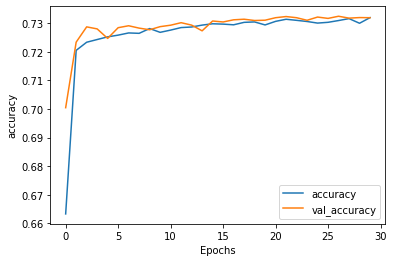

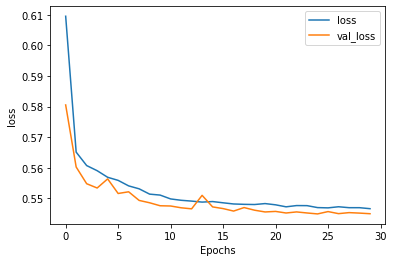

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

using dropout we have avoided overfitting. the curves go well with each other

# MODEL PREDICTION

we are finding the number of correct and wrong predictions made by the model with the testing data. the following code can be used to get the result in batches.

we are comparing the model prediction with the true output automatically. however we will provide some data for the user to test in the website 

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) *1
y_pred
right = 0
wrong = 0
prediction = y_pred.tolist()
prediction_sample = prediction[:12]
y_true = [[i] for i in y_test]
true_sample = y_true[:12]
print(f'\n accuracy : {acc}\n')
print(f' Actual values   : {true_sample}')
print(f'predicted values : {prediction_sample}\n')

for i in range(12):

    if true_sample[i] == prediction_sample[i]:
        right = right +1
    else :
        wrong= wrong + 1
        
print(f'{right} of {12} True Prediction')
print(f'{wrong} of {12} False Prediction')



 accuracy : 0.7485714554786682

 Actual values   : [[1], [1], [1], [0], [0], [1], [1], [0], [0], [1], [0], [0]]
predicted values : [[1], [0], [0], [0], [0], [0], [1], [0], [1], [1], [0], [0]]

8 of 12 True Prediction
4 of 12 False Prediction


we are saving the best model which is going to the loaded onto the website

In [ ]:
tf.keras.models.save_model(model,'mymodel.hdf5')

# WEB APPLICATION

it consists of two parts namely the frontend and backend. the frontend is used to design the webpage and the backend is used to connect it to the server.

we are using streamlit for frontend and pyngrok for backend


In [ ]:
!pip install streamlit

     |████████████████████████████████| 7.9 MB 9.3 MB/s 
     |████████████████████████████████| 4.2 MB 51.6 MB/s 
     |████████████████████████████████| 111 kB 65.5 MB/s 
     |████████████████████████████████| 75 kB 3.1 MB/s 
     |████████████████████████████████| 170 kB 59.0 MB/s 
     |████████████████████████████████| 122 kB 70.3 MB/s 
     |████████████████████████████████| 786 kB 41.6 MB/s 
     |████████████████████████████████| 368 kB 50.5 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13479 sha256=679536ac5b17795cf83aa491d97a56242e67b42b51c4c7a9f19d7f1c06778cce
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting

we are writing the contents present inside the application using %%writefile along with the name of the app. the following steps are followed

1. importing libraries (streamlit, numpy and tensorflow)

2. loading the saved model

3. title design for website

4. adding the dropdown button with features inside it

5. using sliders to get the input from the user

6. defining the class names

7. model prediction

8. output visualisation

the step numbers will be given as the command in the below code

it is recommended to read the streamlit documentation for better understanding

https://docs.streamlit.io/en/stable/

In [ ]:
%%writefile app.py
import streamlit as st #1
import tensorflow as tf #1
import numpy as np     #1

@st.cache(allow_output_mutation=True)
def load_model(): #2
  model=tf.keras.models.load_model('/content/mymodel.hdf5')
  return model
with st.spinner('Model is being loaded..please wait'): #this message will pop up with a spinning symbol (to gather some time for model to load)
  model=load_model()
def main(): #the codes below result in the creation of the main webpage
    st.title("CARDIOVASCULAR RISK PREDICTION-STAGE 1") #3
    st.write("done by V A SAIRAM")
    st.write("this is the detection of cardiovascular disease. in this stage about 10 credentials will be asked and the risk for having the disease will be predicted based on them") #story
    st.write("DISCLAIMER:- this is a preliminary test and the results may not be accurate or desired. it is better to validate with the doctor") #story
    html_temp = """ 
    <div style="background-color:teal ;padding:10px">
    <h2 style="color:white;text-align:center;">CARDIOVASCULAR RISK PREDICTION</h2>
    </div>
    """ #this part produces some coloured effects which can be achieved using HTML codes
    st.markdown(html_temp, unsafe_allow_html=True) #4
    activities=['Deep learning- Artificial Neural Network']
    option=st.sidebar.selectbox('choose the options displayed below',activities) #this is seen as dropdown button in the side of the webpage
    st.subheader(option) #5
    s1=st.slider('Select age', 0, 100) 
    s2=st.slider('Select the gender; 1=>female and 2=>male', 1, 2)
    s3=st.slider('Select the BMI', 18.0, 36.0)
    s4=st.slider('Select the systolic blood pressure value(the reading in the top of bp machine) ', 90, 250)
    s5=st.slider('Select the diastolic blood pressure value(the reading in the bottom of bp machine) ', 60, 150)
    s6=st.slider('Select the status of smoking history 1 if YES 0 if NO', 0, 1)
    s7=st.slider('Select the status of alcohol history 1 if YES 0 if NO', 0, 1)
    s8=st.slider('Select the status of activity 1: active lifestyle     0: sedantry lifestyle', 0, 1)
    s9=st.slider('Select the level of blood cholesterol 1:<170    2:170-199     3:>200', 1, 3)
    s10=st.slider('Select the level of blood glucose 1:<140     2:140-199    3:>200', 1, 3)
    inputs=[[s1,s2,s3,s4,s5,s6,s7,s8,s9,s10]]
    class_names=['the submitted profile is normal and free from cardiovascular risk. Maintain these levels to prevent cardiovascular disease.', #6
                 'the submitted profile is susceptible to cardiovascular risks. It is recommended to lower the blood glucose and cholesterol levels and to consult the doctor for further medications ']
    predictions=model.predict(inputs) #7
    if st.button('Classify'):
      st.success(class_names[np.argmax(predictions)]) #8
      st.success('EAT NUTRITIVE,EXERCISE AND LEAD AN HEALTHY LIFESTYLE!!!')
    st.success("THANK YOU FOR USING THE APPLICATION. WE HOPE FOR A HEALTHY LIFE")
        
if __name__=='__main__': #condition for all the above codes to work
    main()        

Writing app.py


the following codes are done to establish an tunnel(connection) to the website portal

this is actually an alternative way to establish the connection. the usual method is to get an authorisation token from pygrok and use it. however it doesnt work mostly and also shows some issues.

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2021-07-28 12:31:29--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.215.21.243, 54.243.169.86, 52.202.35.83, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.215.21.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  16.3MB/s    in 0.8s    

2021-07-28 12:31:30 (16.3 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]



we unzip the ngrok linux file we installed previously

In [ ]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and then click on to the following URL to see the woking website: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'
    

Execute the next cell and then click on to the following URL to see the woking website: https://c2258f165725.ngrok.io


IMPORTANT INFORMATION:- the website application will work only when the below code is running. hence keep this code running.

if you experience any error like unable to establish tunnel or too many connections then do the following

1. delete the installed zip file
2. rerun the code from !wget, !unzip, get_ipython(), !curl 
3. run the !stremalit code and it will work this time

In [ ]:
!streamlit run /content/app.py

2021-07-28 12:31:51.554169: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.83.10.46:8501

2021-07-28 12:31:53.428831: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-28 12:31:53.442091: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-07-28 12:31:53.442162: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (0ad512472d8a): /proc/driver/nvidia/version does not exist
2021-07-28 12:31:53.650116: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-28 12:31:53.650723: I tensorflow/core/platform/p

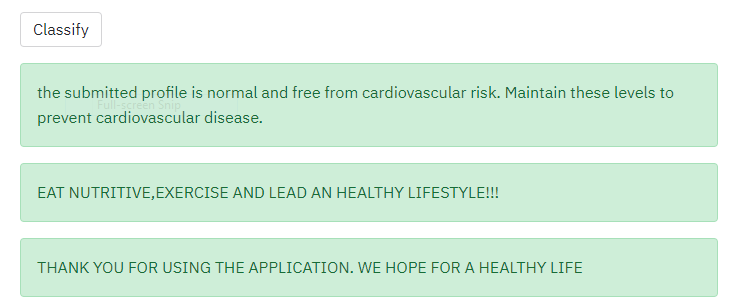



once you have finished your work you can stop this code. i hope this helps!!!

please ask if there are any issues